# Classification

We will now apply classification tools to solve NLP tasks.

We start with a very simple task that looks at words in isolation and tries to classify them into 2 labels: gender identification.
The task consists of guessing whether a name is masculine or feminie.  

The classification method consists of taking as input an observation, turning this observation into a feature vector, then predicting the label of this feature vector by applying a trained classifier model.

To prepare for this procedure, we must train a classifier. In *supervised learning*, a classifier is learned by generalizing a set of observed pairs (observation<sub>i</sub>, label<sub>i</sub>) where [i = 1..N].

In [1]:
%matplotlib inline

def gender_features(word):
    return {'last_letter': word[-1]}
gender_features('Shrek')

{'last_letter': 'k'}

In [2]:
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)

In [5]:
print("There are %s samples in the dataset." % (len(labeled_names)))

There are 7944 samples in the dataset.


In [4]:
import nltk
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [6]:
print("Neo is classified as %s" % (classifier.classify(gender_features('Neo'))))

print("Trinity is classified as %s" % (classifier.classify(gender_features('Trinity'))))


Neo is classified as male
Trinity is classified as female


In [7]:
print(nltk.classify.accuracy(classifier, test_set))

0.77


In [8]:
classifier.show_most_informative_features(5)

Most Informative Features
             last_letter = 'a'            female : male   =     34.2 : 1.0
             last_letter = 'k'              male : female =     32.7 : 1.0
             last_letter = 'f'              male : female =     15.9 : 1.0
             last_letter = 'p'              male : female =     12.6 : 1.0
             last_letter = 'v'              male : female =     11.2 : 1.0


In [9]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count(%s)" % letter] = name.lower().count(letter)
        features["has(%s)" % letter] = (letter in name.lower())
    return features

In [10]:
gender_features2('John') 

{'count(a)': 0,
 'count(b)': 0,
 'count(c)': 0,
 'count(d)': 0,
 'count(e)': 0,
 'count(f)': 0,
 'count(g)': 0,
 'count(h)': 1,
 'count(i)': 0,
 'count(j)': 1,
 'count(k)': 0,
 'count(l)': 0,
 'count(m)': 0,
 'count(n)': 1,
 'count(o)': 1,
 'count(p)': 0,
 'count(q)': 0,
 'count(r)': 0,
 'count(s)': 0,
 'count(t)': 0,
 'count(u)': 0,
 'count(v)': 0,
 'count(w)': 0,
 'count(x)': 0,
 'count(y)': 0,
 'count(z)': 0,
 'first_letter': 'j',
 'has(a)': False,
 'has(b)': False,
 'has(c)': False,
 'has(d)': False,
 'has(e)': False,
 'has(f)': False,
 'has(g)': False,
 'has(h)': True,
 'has(i)': False,
 'has(j)': True,
 'has(k)': False,
 'has(l)': False,
 'has(m)': False,
 'has(n)': True,
 'has(o)': True,
 'has(p)': False,
 'has(q)': False,
 'has(r)': False,
 'has(s)': False,
 'has(t)': False,
 'has(u)': False,
 'has(v)': False,
 'has(w)': False,
 'has(x)': False,
 'has(y)': False,
 'has(z)': False,
 'last_letter': 'n'}

In [11]:
featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.768


In [12]:
train_names = labeled_names[1500:]
devtest_names = labeled_names[500:1500]
test_names = labeled_names[:500]

In [13]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
test_set = [(gender_features(n), gender) for (n, gender) in test_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.761


In [14]:
errors = []
for (name, tag) in devtest_names:
    guess = classifier.classify(gender_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

In [15]:
for (tag, guess, name) in sorted(errors):
    print('correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name))

correct=female   guess=male     name=Allsun                        
correct=female   guess=male     name=Allys                         
correct=female   guess=male     name=Alyson                        
correct=female   guess=male     name=Arleen                        
correct=female   guess=male     name=Aryn                          
correct=female   guess=male     name=Bette-Ann                     
correct=female   guess=male     name=Bird                          
correct=female   guess=male     name=Birgit                        
correct=female   guess=male     name=Brigid                        
correct=female   guess=male     name=Brynn                         
correct=female   guess=male     name=Carolin                       
correct=female   guess=male     name=Carrol                        
correct=female   guess=male     name=Charis                        
correct=female   guess=male     name=Charyl                        
correct=female   guess=male     name=Cherilyn   

In [16]:
def gender_features(word):
    return {'suffix1': word[-1:],
            'suffix2': word[-2:]}

In [17]:
train_set = [(gender_features(n), gender) for (n, gender) in train_names]
devtest_set = [(gender_features(n), gender) for (n, gender) in devtest_names]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, devtest_set))

0.773


# Document Classification

We now turn our attention to classifying full documents as opposed to single words in isolation.

The task seems more challenging, but simple methods can achieve surprisingly good results when the task is well defined.
Consider the task of predicting whether a movie review is positive or negative.
This is a task called *sentiment analysis* and is a hot practical task in the era of user-generated content (UGC) on the Web.

A good dataset is available in NLTK to experiment with this task.

In [18]:
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

In [19]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = [w for (w, c) in all_words.most_common(2000)]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

There are 2000 documents in the movie reviews dataset.
There are 39768 distinct words in the dataset.
There are 1583820 tokens in the dataset.
   ,  the    .    a  and   of   to    '   is   in    s    "   it that    -    )    (   as with  for 
77717 76529 65876 38106 35576 34123 31937 30585 25195 21822 18513 17612 16107 15924 15595 11781 11664 11378 10792 9961 


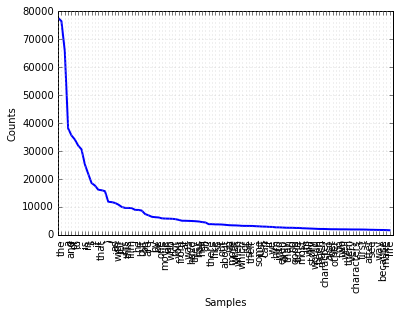

In [20]:
print("There are %d documents in the movie reviews dataset." % (len(documents)))
print("There are %d distinct words in the dataset." % (all_words.B()))
print("There are %d tokens in the dataset." % (all_words.N()))
all_words.tabulate(20)
all_words.plot(100)

In [21]:
print(document_features(movie_reviews.words('pos/cv957_8737.txt'))) 

{'contains(hill)': False, 'contains(reason)': False, 'contains(music)': False, 'contains(impact)': False, 'contains(calls)': False, 'contains(roberts)': False, 'contains(lucas)': False, 'contains(taken)': False, 'contains(mad)': False, 'contains(jackson)': False, 'contains(m)': False, 'contains(band)': False, 'contains(what)': True, 'contains(addition)': False, 'contains(various)': False, 'contains(vincent)': False, 'contains(press)': False, 'contains(perhaps)': False, 'contains(return)': False, 'contains(appear)': False, 'contains(among)': True, 'contains(why)': False, 'contains(recommend)': False, 'contains(sequences)': False, 'contains(william)': False, 'contains(creating)': False, 'contains(died)': False, 'contains(state)': False, 'contains(literally)': False, 'contains(common)': False, 'contains(suddenly)': False, 'contains(predictable)': False, 'contains(continue)': False, 'contains(called)': False, 'contains(fellow)': False, 'contains(jokes)': False, 'contains(open)': False, 'co

In [22]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [24]:
print("Naive Bayes accuracy with 2000 bag of words features is %s" % (nltk.classify.accuracy(classifier, test_set)))
classifier.show_most_informative_features(5) 

Naive Bayes accuracy with 2000 bag of words features is 0.83
Most Informative Features
   contains(outstanding) = True              pos : neg    =     11.3 : 1.0
         contains(mulan) = True              pos : neg    =      9.1 : 1.0
        contains(seagal) = True              neg : pos    =      8.1 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.4 : 1.0
         contains(damon) = True              pos : neg    =      6.1 : 1.0


In [25]:
classifier.show_most_informative_features(20) 

Most Informative Features
   contains(outstanding) = True              pos : neg    =     11.3 : 1.0
         contains(mulan) = True              pos : neg    =      9.1 : 1.0
        contains(seagal) = True              neg : pos    =      8.1 : 1.0
   contains(wonderfully) = True              pos : neg    =      6.4 : 1.0
         contains(damon) = True              pos : neg    =      6.1 : 1.0
         contains(flynt) = True              pos : neg    =      5.7 : 1.0
        contains(wasted) = True              neg : pos    =      5.6 : 1.0
         contains(awful) = True              neg : pos    =      5.3 : 1.0
        contains(poorly) = True              neg : pos    =      5.3 : 1.0
          contains(lame) = True              neg : pos    =      5.2 : 1.0
    contains(ridiculous) = True              neg : pos    =      4.9 : 1.0
         contains(waste) = True              neg : pos    =      4.8 : 1.0
           contains(era) = True              pos : neg    =      4.6 : 1.0

# Back to Part of Speech Tagging

We can consider the task of POS tagging as a classification task and use the classifier methodology described here.
Let us revisit the POS tagging task discussed in the first lecture using the new tools we have developed.

In [26]:
from nltk.corpus import brown
suffix_fdist = nltk.FreqDist()
for word in brown.words():
     word = word.lower()
     suffix_fdist[word[-1:]] += 1
     suffix_fdist[word[-2:]] += 1
     suffix_fdist[word[-3:]] += 1

In [27]:
common_suffixes = [suffix for (suffix, count) in suffix_fdist.most_common(100)]
print(common_suffixes)

['e', ',', '.', 's', 'd', 't', 'he', 'n', 'a', 'of', 'the', 'y', 'r', 'to', 'in', 'f', 'o', 'ed', 'nd', 'is', 'on', 'l', 'g', 'and', 'ng', 'er', 'as', 'ing', 'h', 'at', 'es', 'or', 're', 'it', '``', 'an', "''", 'm', ';', 'i', 'ly', 'ion', 'en', 'al', '?', 'nt', 'be', 'hat', 'st', 'his', 'th', 'll', 'le', 'ce', 'by', 'ts', 'me', 've', "'", 'se', 'ut', 'was', 'for', 'ent', 'ch', 'k', 'w', 'ld', '`', 'rs', 'ted', 'ere', 'her', 'ne', 'ns', 'ith', 'ad', 'ry', ')', '(', 'te', '--', 'ay', 'ty', 'ot', 'p', 'nce', "'s", 'ter', 'om', 'ss', ':', 'we', 'are', 'c', 'ers', 'uld', 'had', 'so', 'ey']


In [28]:
def pos_features(word):
    features = {}
    for suffix in common_suffixes:
        features['endswith(%s)' % suffix] = word.lower().endswith(suffix)
    return features

In [29]:
tagged_words = brown.tagged_words(categories='news', tagset='universal')
featuresets = [(pos_features(n), g) for (n,g) in tagged_words]

In [30]:
size = int(len(featuresets) * 0.1)
train_set, test_set = featuresets[size:], featuresets[:size]
classifier = nltk.NaiveBayesClassifier.train(train_set)
nltk.classify.accuracy(classifier, test_set)

0.7011437095972153

In [31]:
classifier.classify(pos_features('cats'))

'NOUN'

In [32]:
classifier.classify(pos_features('books'))

'NOUN'

In [81]:
classifier.show_most_informative_features(20) 

Most Informative Features
           endswith(the) = True              DET : NOUN   =   3416.9 : 1.0
             endswith(.) = True                . : ADP    =   2481.6 : 1.0
            endswith(to) = True              PRT : ADJ    =   2138.0 : 1.0
             endswith(f) = True              ADP : VERB   =   2050.5 : 1.0
            endswith(he) = True              DET : NOUN   =   1808.9 : 1.0
           endswith(and) = True             CONJ : ADV    =   1642.0 : 1.0
             endswith(a) = True              DET : VERB   =   1597.1 : 1.0
            endswith(of) = True              ADP : NOUN   =   1406.9 : 1.0
           endswith(his) = True              DET : NOUN   =    728.0 : 1.0
            endswith(ut) = True             CONJ : DET    =    694.7 : 1.0
            endswith(nd) = True             CONJ : NUM    =    636.1 : 1.0
           endswith(hat) = True             PRON : NOUN   =    570.6 : 1.0
            endswith(ey) = True             PRON : VERB   =    549.0 : 1.0

# Testing Different Classifiers

NLTK provides a common interface to different classifier algorithms.  This is illustrated in the following examples.

In [33]:
import nltk
train = [
    (dict(a=1,b=1,c=1), 'y'),
    (dict(a=1,b=1,c=1), 'x'),
    (dict(a=1,b=1,c=0), 'y'),
    (dict(a=0,b=1,c=1), 'x'),
    (dict(a=0,b=1,c=1), 'y'),
    (dict(a=0,b=0,c=1), 'y'),
    (dict(a=0,b=1,c=0), 'x'),
    (dict(a=0,b=0,c=0), 'x'),
    (dict(a=0,b=1,c=1), 'y'),
]
test = [
    (dict(a=1,b=0,c=1)), # unseen
    (dict(a=1,b=0,c=0)), # unseen
    (dict(a=0,b=1,c=1)), # seen 3 times, labels=y,y,x
    (dict(a=0,b=1,c=0)), # seen 1 time, label=x
]

## Naive Bayes Classifier

In [34]:
classifier = nltk.classify.NaiveBayesClassifier.train(train)
sorted(classifier.labels())

['x', 'y']

In [35]:
classifier.classify_many(test)

['y', 'x', 'y', 'x']

In [36]:
for pdist in classifier.prob_classify_many(test):
    print('%.4f %.4f' % (pdist.prob('x'), pdist.prob('y')))

0.3203 0.6797
0.5857 0.4143
0.3792 0.6208
0.6470 0.3530


In [37]:
classifier.show_most_informative_features()

Most Informative Features
                       c = 0                   x : y      =      2.0 : 1.0
                       c = 1                   y : x      =      1.5 : 1.0
                       a = 1                   y : x      =      1.4 : 1.0
                       b = 0                   x : y      =      1.2 : 1.0
                       a = 0                   x : y      =      1.2 : 1.0
                       b = 1                   y : x      =      1.1 : 1.0


## Decision Tree Classifier

In [38]:
classifier = nltk.classify.DecisionTreeClassifier.train(
    train, entropy_cutoff=0, support_cutoff=0)
sorted(classifier.labels())

['x', 'y']

In [39]:
print(classifier)

c=0? .................................................. x
  a=0? ................................................ x
  a=1? ................................................ y
c=1? .................................................. y



In [40]:
classifier.classify_many(test)

['y', 'y', 'y', 'x']

There is no prob() method for decision tree classifiers, as they do not provide a probability interpretation.

## Scikit-Learn Classifiers

NLTK provides an interface to the Scikit-learn (sklearn) classifiers - including maximum entropy and SVM.

In [41]:
from nltk.classify import SklearnClassifier
train_data = [({"a": 4, "b": 1, "c": 0}, "ham"),
              ({"a": 5, "b": 2, "c": 1}, "ham"),
              ({"a": 0, "b": 3, "c": 4}, "spam"),
              ({"a": 5, "b": 1, "c": 1}, "ham"),
              ({"a": 1, "b": 4, "c": 3}, "spam")]
test_data = [{"a": 3, "b": 2, "c": 1},
             {"a": 0, "b": 3, "c": 7}]

In [42]:
from sklearn.naive_bayes import BernoulliNB
classif = SklearnClassifier(BernoulliNB()).train(train_data)
classif.classify_many(test_data)

['ham', 'spam']

In [43]:
from sklearn.svm import SVC
classif = SklearnClassifier(SVC(), sparse=False).train(train_data)
classif.classify_many(test_data)

['ham', 'spam']

In [44]:
# Using the sklearn classifier:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = SVC(kernel='linear', C=1.0)
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
classifr = SklearnClassifier(SVC(kernel='rbf', C=1.0), sparse=False).train(train_data)

In [46]:
classifr.classify_many(test_data)

['ham', 'spam']

In [47]:
from sklearn.svm import LinearSVC
classif_ova = SklearnClassifier(LinearSVC(C=1.0), sparse=False).train(train_data)

In [48]:
classif_ova.classify_many(test_data)

['ham', 'spam']

The key parameter to optimize for a given SVM kernel is the C parameter.
Here is example code from sklearn that shows how to optimize C on a development set.

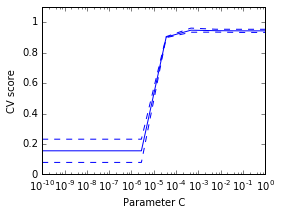

In [49]:
%matplotlib inline

import numpy as np
from sklearn import cross_validation, datasets, svm

digits = datasets.load_digits()
X = digits.data
y = digits.target

svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = list()
scores_std = list()
for C in C_s:
    svc.C = C
    this_scores = cross_validation.cross_val_score(svc, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

# Do the plotting
import matplotlib.pyplot as plt
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.ylabel('CV score')
plt.xlabel('Parameter C')
plt.ylim(0, 1.1)
plt.show()